<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-07-01-CNN_Art/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

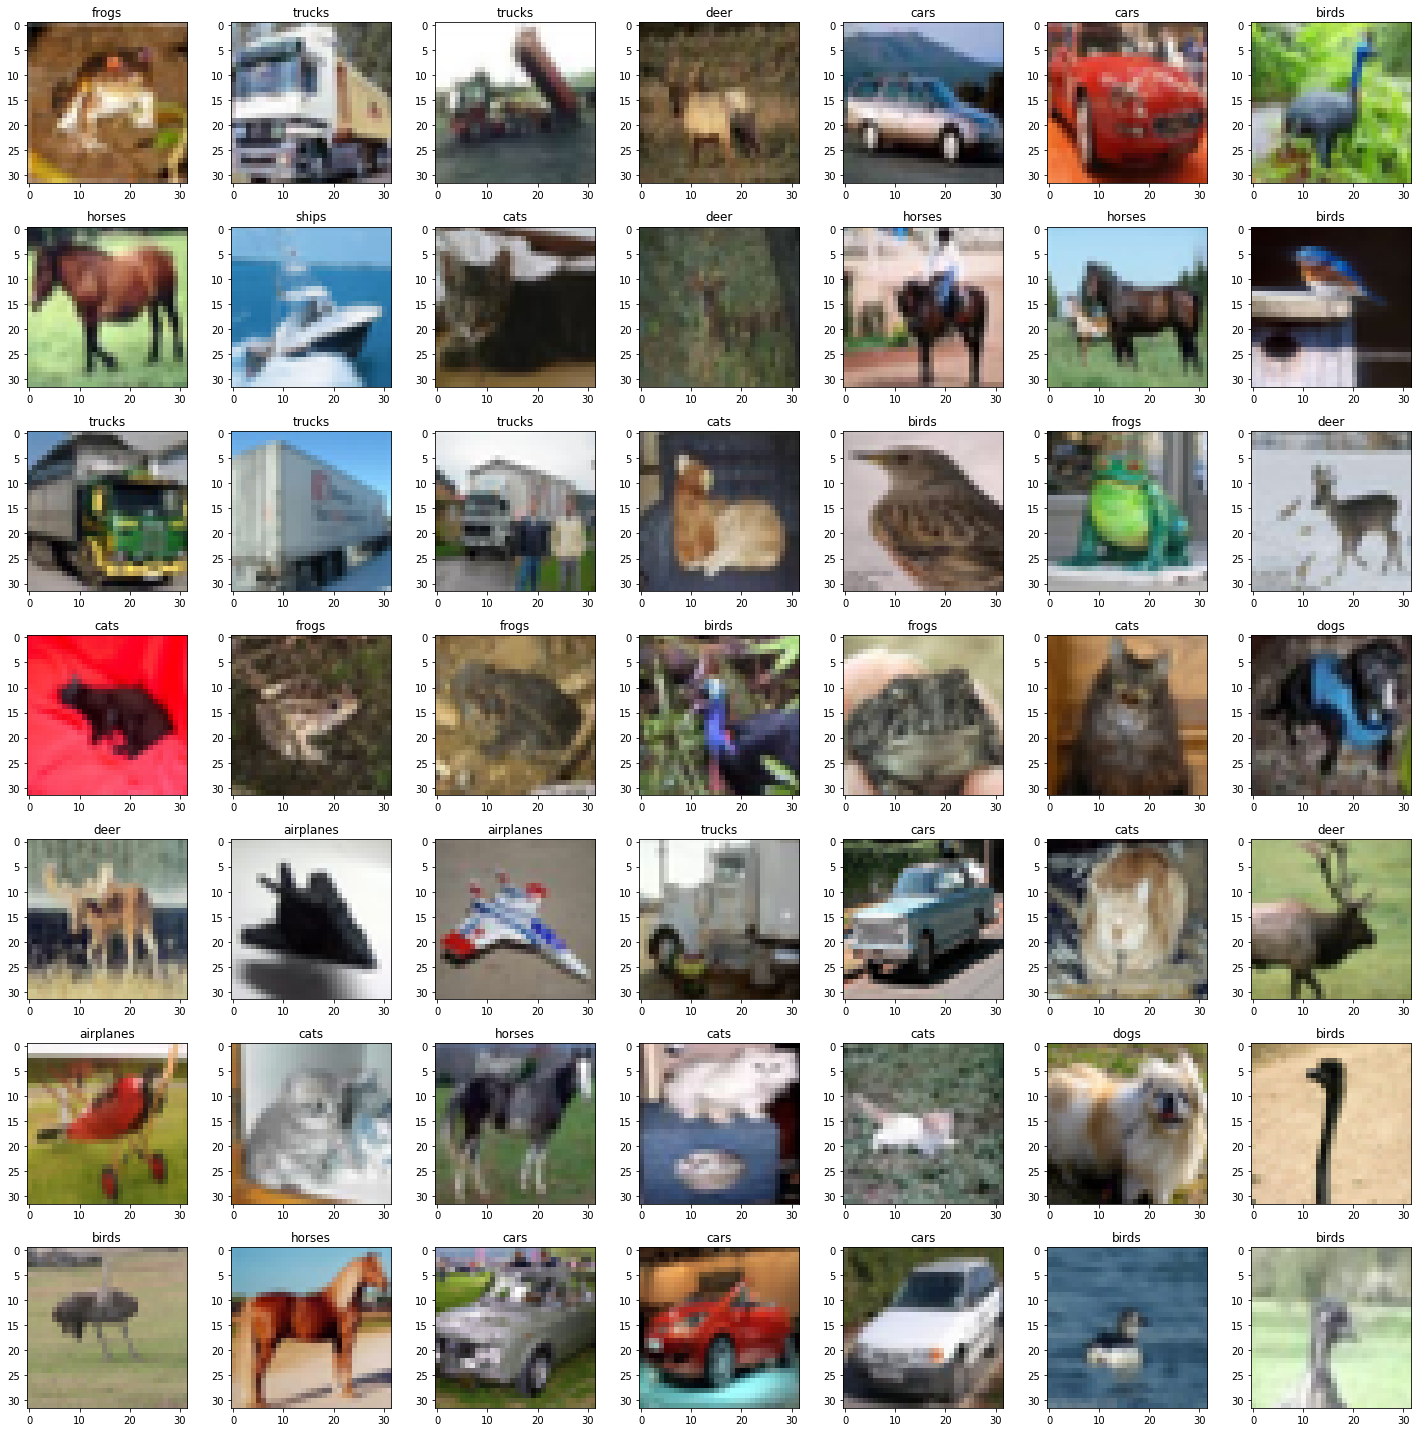

In [ ]:
L=7
W=7
fig, axes = plt.subplots(L, W, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(x_train[i])
  axes[i].set_title(class_names[y_train[i][0]])

plt.tight_layout()
plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

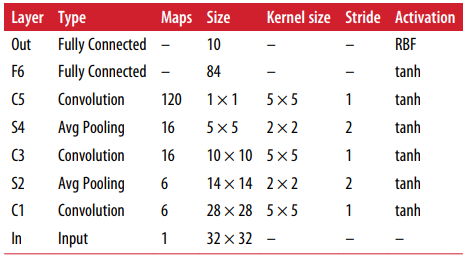

In [ ]:
lenet = tf.keras.models.Sequential([
            tf.keras.Input(shape=[32, 32, 3]),
            tf.keras.layers.Conv2D(6, (5, 5), activation='tanh'),
            tf.keras.layers.AveragePooling2D((2, 2), strides=2),
            tf.keras.layers.Activation(tf.keras.activations.tanh),

            tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='valid', activation='tanh'),
            tf.keras.layers.AveragePooling2D((2, 2), strides=2),
            tf.keras.layers.Activation(tf.keras.activations.tanh),

            tf.keras.layers.Conv2D(120, (5, 5), activation='tanh'),
            
            # feature extraction done here

            tf.keras.layers.Flatten(),

            tf.keras.layers.Dense(84, activation='tanh'),
            tf.keras.layers.Dense(10, activation='softmax')
])

lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [ ]:
lenet.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = lenet.fit(x_train, y_train, batch_size=32*4, epochs=5, validation_data=(x_test, y_test)).history

Epoch 1/5
391/391 [==============================] - 36s 89ms/step - loss: 1.7122 - accuracy: 0.3902 - val_loss: 1.7258 - val_accuracy: 0.3783
Epoch 2/5
391/391 [==============================] - 34s 88ms/step - loss: 1.5362 - accuracy: 0.4540 - val_loss: 1.5749 - val_accuracy: 0.4350
Epoch 3/5
391/391 [==============================] - 34s 86ms/step - loss: 1.4495 - accuracy: 0.4823 - val_loss: 1.4084 - val_accuracy: 0.4897
Epoch 4/5
391/391 [==============================] - 34s 86ms/step - loss: 1.3817 - accuracy: 0.5084 - val_loss: 1.3705 - val_accuracy: 0.5134
Epoch 5/5
391/391 [==============================] - 34s 86ms/step - loss: 1.3268 - accuracy: 0.5283 - val_loss: 1.3327 - val_accuracy: 0.5205


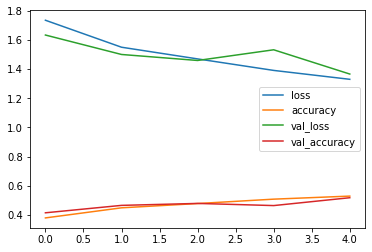

In [ ]:
pd.DataFrame(history).plot()

Padding = "SAME"

<img src="https://i.imgur.com/RvGM2xb.gif" width="300">




Stride

Stride=(1,1)

<img src="https://i.imgur.com/LueNK6b.gif" width="300">

Stride=(2,2) = 2

<img src="https://i.imgur.com/Tlptsvt.gif" width="300">

